## Setup

In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tensorflow import keras

Our electromagnet model provides linear relationship between the voltage and field. In order to explore non-linear relationship, we need to introduce non-linearity by hand. We will do it  by applying tanh element-wise to the field values.

In [6]:
#Load data
df = pd.read_csv('data/individual_calibration_set.csv')

Bx, By, Bz = df['B_x'].to_numpy(), df['B_y'].to_numpy(), df['B_z'].to_numpy() # Extract fields
V1, V2, V3 = df['V_1'].to_numpy(), df['V_2'].to_numpy(), df['V_3'].to_numpy()  # Extract voltages

# Introduce non-linearity
nf = 15 # Non-linearity factor
Bx, By, Bz = np.tanh(Bx/nf)*np.max(Bx), np.tanh(By/nf)*np.max(By), np.tanh(Bz/nf)*np.max(Bz)

## Plot non-linear data

In [7]:
def B_vs_V(x:np.array, y1:np.array, y2:np.array, y3:np.array):
    """plots y1, y2, and y3 vs x and returns the corresponding slopes"""
    index = x != 0 # Indexes for which v is non-zero
    x, y1, y2, y3 = x[index], y1[index], y2[index], y3[index] # Values for which v is non-zero

    # Plot
    fig, ax = plt.subplots()
    ax.plot(x, y1, label=r'$B_x$', linewidth=4.0)
    ax.plot(x, y2, label=r'$B_y$', linewidth=4.0)
    ax.plot(x, y3, label=r'$B_z$', linewidth=4.0)
    ax.set_xlabel(r'$V_1$ (arb. u.)')
    ax.set_ylabel('Field (arb. u.)' )
    #ax.set_xlim(0,1)
    ax.legend(loc=0)
    ax.grid()
    return ax

<AxesSubplot:xlabel='$V_1$ (arb. u.)', ylabel='Field (arb. u.)'>

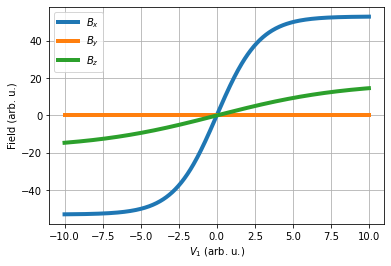

In [8]:
B_vs_V(V1, Bx, By, Bz)

Text(0.5, 0, '$V_2$ (arb. u.)')

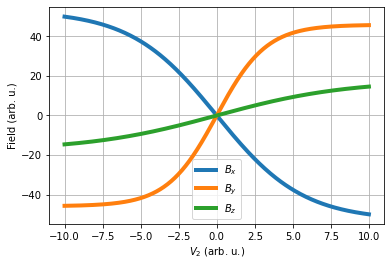

In [9]:
ax2 = B_vs_V(V2, Bx, By, Bz)
ax2.set_xlabel(r'$V_2$ (arb. u.)')

Text(0.5, 0, '$V_3$ (arb. u.)')

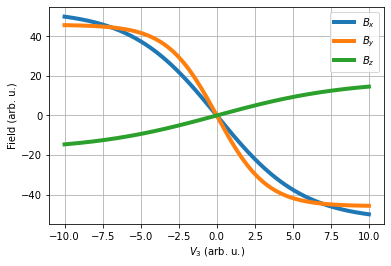

In [10]:
ax3 = B_vs_V(V3, Bx, By, Bz)
ax3.set_xlabel(r'$V_3$ (arb. u.)')

## 'Deep' learning

In [11]:
# Initialize model
model = keras.models.Sequential([
    keras.layers.Dense(3),
    keras.layers.Dense(18,activation='relu'),
    keras.layers.Dense(3)
])

In [12]:
# Compile model
model.compile(loss="mse", optimizer = keras.optimizers.Adam(), metrics=["mae"])

In [13]:
# Add a callback that stops training if mean absolute error does not improve for 300 epochs
early_stopping_cb = keras.callbacks.EarlyStopping(patience=300, monitor='val_mae',restore_best_weights=True)

In [ ]:
# Train model
history = model.fit(B_train, Y_train, epochs=1000, validation_data=(B_test, Y_test),batch_size=8,callbacks=[checkpoint_cb,early_stopping_cb])